# Deep Learning Prediction of 4 Stages of Alzheimer's Progression
by: Babs Khalidson 

## Aim Of this Project

The aim of this project is create accurate model that is able to predict 4 stages of Alzheimers using a [neuroimaging dataset](https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images/data) acquired from Kaggle. 

In [1]:
from fastai.vision import *
import pandas as pd

### Create path for where the dataset is saved

In [6]:
path = Path('/home/jupyter/tutorials/data/alzheimers/dataset')
train = Path('/home/jupyter/tutorials/data/alzheimers/dataset/train')
test = Path('/home/jupyter/tutorials/data/alzheimers/dataset/test')

In [7]:
path.ls()

[PosixPath('/home/jupyter/tutorials/data/alzheimers/dataset/train'),
 PosixPath('/home/jupyter/tutorials/data/alzheimers/dataset/test')]

## View data

In [9]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [10]:
data.classes

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

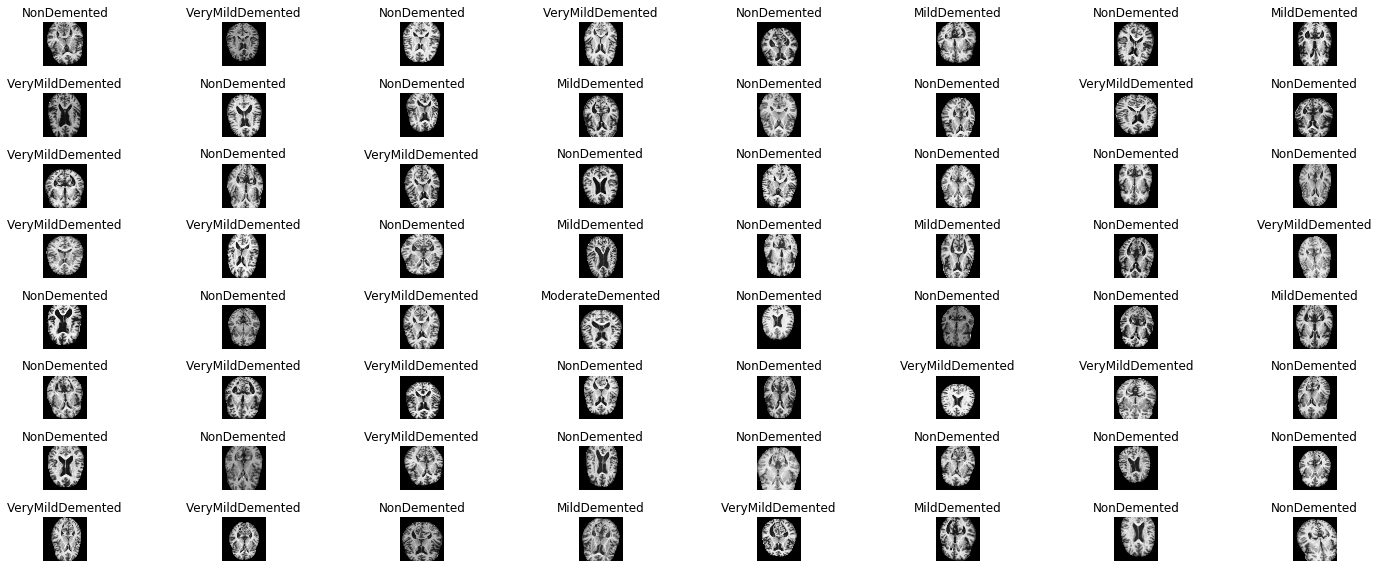

In [11]:
data.show_batch(rows=10, figsize=(20,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],
 4,
 4097,
 1024)

## Train model

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.829883,1.221899,0.431641,00:13
1,1.325981,0.858215,0.384766,00:12
2,1.037218,0.795179,0.361328,00:12
3,0.928963,0.779598,0.359375,00:12


In [15]:
learn.save('stage-1')

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


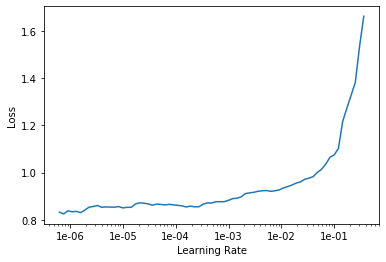

In [18]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.840011,0.719699,0.315430,00:13
1,0.746747,0.574926,0.253906,00:13


In [20]:
learn.save('stage-2')

## Interpretation

In [21]:
learn.load('stage-2');

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

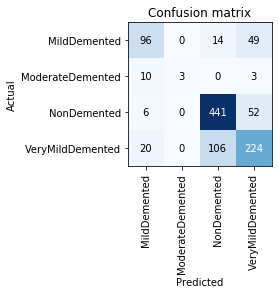

In [23]:
interp.plot_confusion_matrix()

## Training: resnet50
Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [24]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


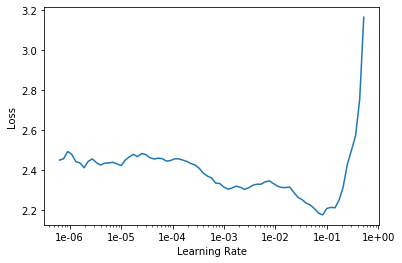

In [25]:
learn.lr_find()
learn.recorder.plot()


In [26]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.990700,1.378966,0.474609,00:18
1,1.513155,0.864656,0.363281,00:18
2,1.123046,0.835260,0.381836,00:18
3,0.931402,0.751979,0.336914,00:18
4,0.847933,0.710752,0.318359,00:18
5,0.796995,0.688013,0.319336,00:18
6,0.740479,0.668372,0.308594,00:18
7,0.711847,0.656978,0.289062,00:18


In [27]:
learn.save('resnet50')

It's astonishing that it's possible to recognize alzheimers stages so accurately! Let's see if full fine-tuning helps:

In [28]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.695186,0.634407,0.282227,00:24
1,0.659965,0.597474,0.261719,00:23
2,0.646931,0.588571,0.258789,00:23


## Training: [resnet101](https://uk.mathworks.com/help/deeplearning/ref/resnet101.html;jsessionid=21f8604a379395c3c372368ce784)

ResNet-101 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 101 layers deep and can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images [[1]](https://uk.mathworks.com/help/deeplearning/ref/resnet101.html).
